## 1. Defining the Question

### a) Specifying the Question






> Make a prediction to score between team 1 and team 2, based on who's home and who's away, when they are playing a friendly match. Using the ranking from FIFA to assist in making predictions


### b) Defining the Metric for Success



> 

1.   Do a polynomial regression
2.   Do a logistic regression





### c) Understanding the context 



> Mchezopesa Ltd have just joined the betting booming business and they are curious to know how they will be assigning odds according to how FIFA ranks teams. This will make mchezopesa give out relevant odds so that they can attact more customers.



### d) Recording the Experimental Design



1.   Perform EDA
2.   Perform Feature Engineering if necessary
3.   Check for multicoliinearity
4.   build the model
5.   Perform cross validation
6.   calculate the RMSE
7.   Create the residual plots and assess for heteroskedicity









### e) Data Relevance



> This data was gotten from FIFA. Its relavant to Mchezopesa since they are a betting firm that want to establish their roots in the Kenyan market. There is no other way to get better other than using the main source of data, ie, the governing body of football, FIFA.



## 2. Reading the Data

In [0]:
# importing the neccessary datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
# Loading the two Datasets
ranking = pd.read_csv('fifa_ranking.csv') 
results = pd.read_csv('results.csv')

## 3. Checking the Data

In [171]:
# Determining the no. of records in our dataset

print(ranking.shape)
print('*'*50)
results.shape

(57793, 16)
**************************************************


(40839, 9)

Ranking has 57,793 rows and 16 columns
******
Results has 40,839 rows and 9 columns

In [172]:
# Previewing the top of our dataset
print(ranking.head())
print('*'*50)
results.head()

   rank country_full  ... confederation   rank_date
0     1      Germany  ...          UEFA  1993-08-08
1     2        Italy  ...          UEFA  1993-08-08
2     3  Switzerland  ...          UEFA  1993-08-08
3     4       Sweden  ...          UEFA  1993-08-08
4     5    Argentina  ...      CONMEBOL  1993-08-08

[5 rows x 16 columns]
**************************************************


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [173]:
# Previewing the bottom of our dataset
print(ranking.tail())
print('*'*50)
results.tail()

       rank country_full  ... confederation   rank_date
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[5 rows x 16 columns]
**************************************************


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [174]:
# Checking whether each column has an appropriate datatype
print(ranking.info())
print('*'*50)
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_year_avg_weighted     57793 non-null float64
two_year_ago_avg           57793 non-null float64
two_year_ago_weighted      57793 non-null float64
three_year_ago_avg         57793 non-null float64
three_year_ago_weighted    57793 non-null float64
confederation              57793 non-null object
rank_date                  57793 non-null object
dtypes: float64(9), int64(3), object(4)
memory usage: 7.1+ MB
None
**********************************

There are 4 categorical data and 12 numerical data in rankings
*******
There are 6 categorical data and 3 numerical data in results

In [175]:
#checking for the summary of the numerical data
print(ranking.describe().transpose())
print('*'*50)
results.describe().transpose()

                           count        mean  ...     75%      max
rank                     57793.0  101.628086  ...  152.00   209.00
total_points             57793.0  122.068637  ...   92.79  1775.03
previous_points          57793.0  332.302926  ...  525.00  1920.00
rank_change              57793.0   -0.009897  ...    1.00    92.00
cur_year_avg             57793.0   61.798602  ...   32.25  1158.66
cur_year_avg_weighted    57793.0   61.798602  ...   32.25  1158.66
last_year_avg            57793.0   61.004602  ...   26.66  1169.57
last_year_avg_weighted   57793.0   30.502377  ...   13.33   584.79
two_year_ago_avg         57793.0   59.777462  ...   21.50  1159.71
two_year_ago_weighted    57793.0   17.933277  ...    6.45   347.91
three_year_ago_avg       57793.0   59.173916  ...   21.25  1200.77
three_year_ago_weighted  57793.0   11.834811  ...    4.25   240.15

[12 rows x 8 columns]
**************************************************


,count,mean,std,min,25%,50%,75%,max
home_score,40839.0,1.745709,1.749145,0.0,1.0,1.0,2.0,31.0
away_score,40839.0,1.188105,1.405120,0.0,0.0,1.0,2.0,21.0


In [176]:
# checking the summary of the categorical data
print(ranking.describe(include='O').transpose())
print('*'*50)
results.describe(include='O').transpose()

               count unique         top   freq
country_full   57793    216       Sudan    325
country_abrv   57793    216         SDN    325
confederation  57793      6        UEFA  14933
rank_date      57793    286  2017-11-23    211
**************************************************


,count,unique,top,freq
date,40839,15115,2012-02-29,66
home_team,40839,309,Brazil,563
away_team,40839,306,Uruguay,536
tournament,40839,109,Friendly,16911
city,40839,1960,Kuala Lumpur,581
country,40839,266,United States,1144


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

Sportpesa has an issue close to this one. The data we had was less than than this one since FIFA updated their new findings. 

## 5. Tidying the Dataset

In [177]:
print(ranking.isnull().sum().sum())
print('*'*50)
results.isnull().sum().sum()

0
**************************************************


0

there are no null values in both datasets

In [178]:
print(ranking.duplicated().sum())
print('*'*50)
results.duplicated().sum().sum()

37
**************************************************


0

There are 37 duplicated rows in ranking
*****
There are no duplicates in results dataset

*Dealing with duplicates*

In [0]:
ranking.drop_duplicates(inplace= True)

In [180]:
#verifying whether the duplicates have been dropped
ranking.duplicated().sum()

0

All duplicates have been dropped.

## 6. Exploratory Analysis

Before we begin, we will need to join our data.

In [181]:
footy = ranking.join(results)
footy

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
# checking for null in the dataset
footy.isnull().sum()

rank                           0
country_full                   0
country_abrv                   0
total_points                   0
previous_points                0
rank_change                    0
cur_year_avg                   0
cur_year_avg_weighted          0
last_year_avg                  0
last_year_avg_weighted         0
two_year_ago_avg               0
two_year_ago_weighted          0
three_year_ago_avg             0
three_year_ago_weighted        0
confederation                  0
rank_date                      0
date                       16917
home_team                  16917
away_team                  16917
home_score                 16917
away_score                 16917
tournament                 16917
city                       16917
country                    16917
neutral                    16917
dtype: int64

In [0]:
#drop null values since filling the null with other means like mean and median will 
# bias the infomation in the dataset since this were actual games played

footy.dropna( inplace=True)

In [184]:
# checking whether the missing data has been dropped
footy.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
date                       0
home_team                  0
away_team                  0
home_score                 0
away_score                 0
tournament                 0
city                       0
country                    0
neutral                    0
dtype: int64

The missing values have finally been dropped

In [185]:
# checking for duplicates
footy.duplicated().sum()

0

There are no duplicates

**Filtering the dataset**

this  helps us to focus on team that played only friendlies.

In [0]:
footie = footy.loc[footy['tournament'] == 'Friendly']


In [187]:
#checking where filtering has been a success
print(footy.shape)
print('*'*50)
footie.shape

(40839, 25)
**************************************************


(16911, 25)



> There is a decrase in the number of rows. This means that we are now dealing with only friendly matches.



In [0]:
# resetting the index
footie = footie.reset_index()

**Ploting the univariate summaries and recording our observations**


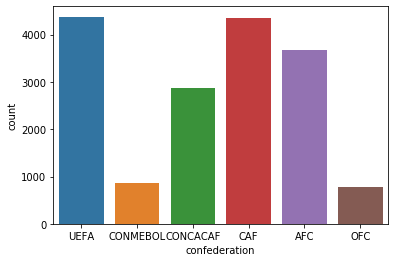

In [188]:
sns.countplot(x='confederation', data=footie)


UEFA is the most popularly played competition

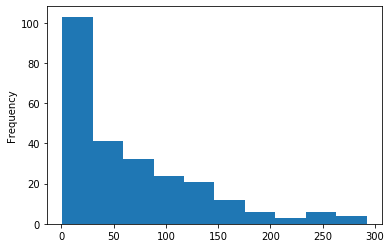

In [189]:
footie.home_team.value_counts().plot.hist()
plt.show()

The home team distribution is skewed to the right. 

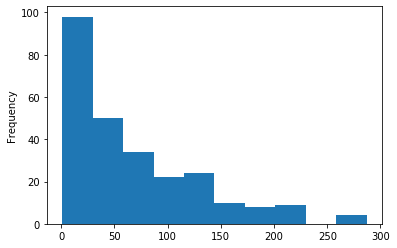

In [190]:
footie.away_team.value_counts().plot.hist()

The away team distribution is also skewed to the right.

**Correlation**

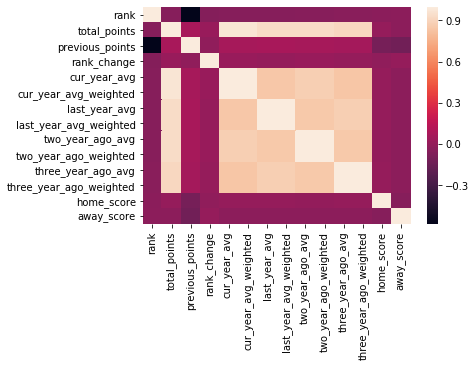

In [191]:
vg_corr = footie.corr()
sns.heatmap(vg_corr, 
            xticklabels = vg_corr.columns.values,
            yticklabels = vg_corr.columns.values);

most of the data seems independent since the color purple is dominant which indicates a covariance of 0.

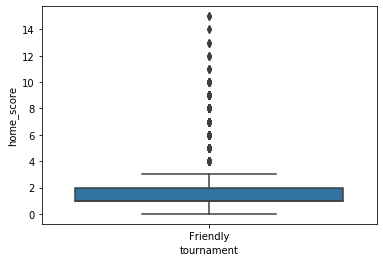

In [192]:
sns.boxplot(x='tournament', y='home_score', data=footie)

there are outliers as expected since there is a posibility a home team to score more goals than expected in the dataset

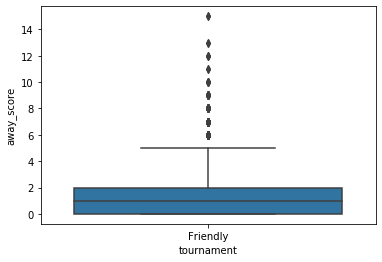

In [193]:
sns.boxplot(x='tournament', y='away_score', data=footie)

there are outliers as expected since there is a posibility an away team to score more goals than expected in the dataset

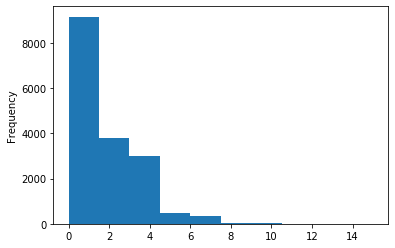

In [196]:
footie.home_score.plot.hist()

The home scores is distributed highly on the left of the histogram. This indicates that there is a high tendancy of home teams to score 0 or 1 goal

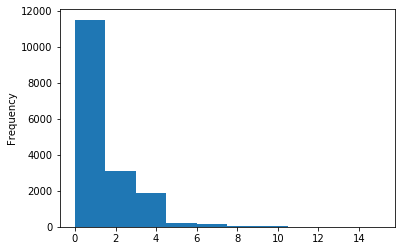

In [197]:
footie.away_score.plot.hist()

The away scores is distributed highly on the left of the histogram. This indicates that there is a high tendancy of away teams to score 0 or 1 goal

In [198]:
#changing categorical data to numercal data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

footie.country_full = le.fit_transform(footie.country_full)
footie.country_abrv = le.fit_transform(footie.country_abrv)
footie.confederation  = le.fit_transform(footie.confederation)             
footie.rank_date  = le.fit_transform(footie.rank_date)                 
footie.date  = le.fit_transform(footie.date)                      
footie.home_team = le.fit_transform(footie.home_team)                  
footie.away_team = le.fit_transform(footie.away_team) 
footie.tournament  = le.fit_transform(footie.tournament)                
footie.city = le.fit_transform(footie.city)                        
footie.country = le.fit_transform(footie.country)                    
footie.neutral = le.fit_transform(footie.neutral)   

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [199]:
# checking whether the categorical data has changed to numerical
footie.dtypes

rank                         int64
country_full                 int64
country_abrv                 int64
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation                int64
rank_date                    int64
date                         int64
home_team                    int64
away_team                    int64
home_score                 float64
away_score                 float64
tournament                   int64
city                         int64
country                      int64
neutral                      int64
dtype: object

**checking for multicollinearity**

**Polynomial regression for home team**

In [0]:
#removing columns that we consider as dependent variables, so as to focus
# on independent variables
independent = footie.drop(columns=['home_team', 'tournament'])

In [202]:
correlation = independent.corr()
correlation

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,away_team,home_score,away_score,city,country,neutral
rank,1.000000,-0.040244,0.002600,-0.048439,-0.584794,-0.054329,-0.046255,-0.046255,-0.048748,-0.048748,-0.045613,-0.045613,-0.039904,-0.039904,-0.355831,0.077494,0.096767,-0.002680,-0.029800,-0.022367,-0.005693,-0.003087,0.017119
country_full,-0.040244,1.000000,0.926465,-0.003634,-0.001099,0.000510,-0.003287,-0.003287,-0.003560,-0.003560,-0.003209,-0.003209,-0.004466,-0.004466,-0.048060,-0.024785,-0.025262,-0.003463,0.002487,0.001997,-0.011924,0.007264,0.016622
country_abrv,0.002600,0.926465,1.000000,-0.003591,-0.029933,-0.000089,-0.003271,-0.003271,-0.004039,-0.004039,-0.003040,-0.003041,-0.003232,-0.003232,-0.070987,-0.019171,-0.019047,-0.003372,-0.000332,-0.002822,-0.010033,0.006808,0.019654
total_points,-0.048439,-0.003634,-0.003591,1.000000,0.073966,0.016745,0.974419,0.974419,0.933622,0.933622,0.936087,0.936090,0.913879,0.913878,0.018319,0.122021,0.094650,-0.000672,0.003860,-0.024039,-0.002108,0.019401,0.027714
previous_points,-0.584794,-0.001099,-0.029933,0.073966,1.000000,-0.013017,0.070433,0.070433,0.073879,0.073879,0.068966,0.068966,0.064340,0.064340,0.246251,0.502394,0.538025,-0.004858,-0.105030,-0.122663,0.007785,0.033625,0.071934
rank_change,-0.054329,0.000510,-0.000089,0.016745,-0.013017,1.000000,0.021149,0.021149,0.006986,0.006986,0.017699,0.017700,0.009452,0.009452,0.019620,0.003678,0.003134,0.003099,-0.013775,0.004670,-0.004270,0.000526,0.007993
cur_year_avg,-0.046255,-0.003287,-0.003271,0.974419,0.070433,0.021149,1.000000,1.000000,0.846672,0.846672,0.880801,0.880804,0.845102,0.845102,0.016549,0.120874,0.093772,-0.001374,0.004577,-0.021553,-0.003525,0.018631,0.028063
cur_year_avg_weighted,-0.046255,-0.003287,-0.003271,0.974419,0.070433,0.021149,1.000000,1.000000,0.846672,0.846672,0.880801,0.880804,0.845102,0.845102,0.016549,0.120874,0.093772,-0.001374,0.004577,-0.021553,-0.003525,0.018631,0.028063
last_year_avg,-0.048748,-0.003560,-0.004039,0.933622,0.073879,0.006986,0.846672,0.846672,1.000000,1.000000,0.857237,0.857242,0.876694,0.876691,0.018210,0.106949,0.082928,0.001365,0.003764,-0.023096,0.001838,0.018933,0.024943
last_year_avg_weighted,-0.048748,-0.003560,-0.004039,0.933622,0.073879,0.006986,0.846672,0.846672,1.000000,1.000000,0.857238,0.857242,0.876695,0.876691,0.018210,0.106948,0.082928,0.001366,0.003764,-0.023096,0.001838,0.018932,0.024943


In [203]:
#computing for the VIF
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,away_team,home_score,away_score,city,country,neutral
rank,2.813403,2.376368e-01,-0.157406,-5.128025e+02,2.498011e+00,0.181134,1.029228e+04,-9.085789e+03,1.167143e+02,1.531140e+01,-1.980421e+02,2.831039e+02,2.565818e+01,2.862879e+01,3.512237e-01,2.942591e+00,-4.503289e+00,0.023244,0.008050,-0.012115,1.885809e-02,2.861625e-02,1.764149e-02
country_full,0.237637,7.156497e+00,-6.633416,-3.984364e+03,-9.101445e-02,0.007232,3.713433e+06,-3.711063e+06,9.073754e+02,1.201377e+02,-3.345747e+02,9.961963e+02,-1.545032e+02,5.765591e+02,-1.897347e-02,-3.585299e-02,1.065504e-01,0.002878,-0.010376,-0.023981,2.027435e-02,-8.616585e-03,2.565422e-03
country_abrv,-0.157406,-6.633416e+00,7.156478,4.710657e+03,1.426698e-01,-0.003794,-6.006577e+06,6.003848e+06,-1.072799e+03,-1.420389e+02,5.355958e+01,-8.357968e+02,-9.627908e+01,-4.027137e+02,9.686111e-02,1.057183e-01,-1.805528e-01,0.003135,0.013841,0.030432,-7.993016e-03,3.330014e-03,-2.615569e-02
total_points,-2420.095744,1.485228e+04,9291.821270,-4.312154e+10,2.242807e+04,-5789.386373,1.191232e+18,-1.191232e+18,9.820878e+09,1.300954e+09,-1.124381e+10,1.840472e+10,-5.171423e+10,5.628098e+10,-1.369170e+04,-8.487112e+04,4.937561e+04,175.777393,-7460.294225,-7826.470098,3.738437e+04,1.778525e+04,3.305941e+04
previous_points,2.498011,-9.101453e-02,0.142670,-1.660245e+03,3.830741e+00,0.192144,-4.623150e+05,4.631895e+05,3.779948e+02,5.005150e+01,-6.438605e+02,9.195642e+02,-2.323879e+02,4.083082e+02,-9.478139e-02,3.784359e+00,-6.023216e+00,0.030889,0.001546,-0.009323,8.529235e-03,2.742227e-02,4.140649e-02
rank_change,0.181134,7.231680e-03,-0.003794,1.552247e+03,1.921438e-01,1.014089,-7.819012e+05,7.811283e+05,-3.534729e+02,-4.679572e+01,3.200459e+02,-5.778391e+02,6.023339e+01,-2.246226e+02,-4.701209e-03,2.093595e-01,-3.253539e-01,-0.000977,0.013795,-0.004479,4.432160e-03,2.588012e-03,-4.966565e-03
cur_year_avg,192025.872289,-1.639330e+06,-850448.530918,7.910358e+16,-2.435965e+06,681743.577005,-1.190902e+20,1.190491e+20,-1.155092e+12,-2.039971e+16,1.349226e+12,-1.313710e+16,5.255849e+12,-8.383822e+15,1.331221e+06,9.208236e+06,-5.420512e+06,-65552.937782,689662.648434,825394.012879,-3.867762e+06,-1.770523e+06,-3.397735e+06
cur_year_avg_weighted,-190766.712261,1.631603e+06,845614.136574,-7.910356e+16,2.424296e+06,-678731.484212,1.184704e+20,-1.184293e+20,1.149982e+12,2.039971e+16,-1.343376e+12,1.313709e+16,-5.228943e+12,8.383793e+15,-1.324097e+06,-9.164079e+06,5.394823e+06,65461.485576,-685781.182807,-821322.024997,3.848311e+06,1.761269e+06,3.380535e+06
last_year_avg,116.699193,9.074670e+02,-1072.674491,-7.807312e+09,3.781889e+02,-353.518339,9.286685e+12,-9.282623e+12,1.778076e+09,2.354325e+08,-1.673974e+08,1.463870e+09,-1.024649e+08,9.294085e+08,-1.272862e+02,-1.089663e+03,6.634373e+02,172.590311,139.953144,-142.957027,3.085993e+02,-4.628575e+02,3.023019e+02
last_year_avg_weighted,507.409370,-4.737905e+03,-1323.661721,1.892839e+10,-6.162533e+03,1846.642154,-3.072289e+17,3.072288e+17,-4.310889e+09,-5.709497e+08,3.067193e+09,-6.210470e+09,1.343959e+10,-1.544430e+10,3.658392e+03,2.297808e+04,-1.339743e+04,-217.938798,1784.052884,2161.410407,-9.950073e+03,-4.123976e+03,-8.828350e+03


country_abrv has a VIF of 7, this poses a potential problem. The column has to be removed.

In [204]:
revised = independent.drop(columns=['country_abrv'])
correlation = revised.corr()

pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,rank,country_full,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,away_team,home_score,away_score,city,country,neutral
rank,2.809941,0.091736,-3.181648e+02,2.501149,0.181050,-2.466199e+04,2.477851e+04,9.311862e+01,-1.102628e+01,-1.968647e+02,2.496582e+02,2.353676e+01,1.019500e+01,0.353354,2.944916e+00,-4.507260,0.023313,0.008354,-0.011445,0.018682,0.028689,0.017066
country_full,0.091736,1.007912,2.971490e+02,0.041228,0.003715,-1.598241e+05,1.596630e+05,-8.699994e+01,1.036924e+01,-2.849455e+02,2.356065e+02,-2.438167e+02,2.123444e+02,0.070808,6.213831e-02,-0.060806,0.005783,0.002453,0.004226,0.012866,-0.005530,-0.021679
total_points,-283.920920,2978.776975,-4.258901e+09,2820.972424,-734.338255,1.133839e+17,-1.133839e+17,1.246937e+09,-1.484677e+08,-1.427355e+09,2.134609e+09,-6.565006e+09,7.016023e+09,-1754.261504,-1.084170e+04,6347.353015,21.651234,-948.658444,-997.644615,4746.977648,2257.738054,4200.327211
previous_points,2.501149,0.041228,-1.364671e+03,3.827896,0.192219,-9.157683e+04,9.228695e+04,3.993822e+02,-4.756309e+01,-6.449292e+02,8.715479e+02,-2.304776e+02,3.750931e+02,-0.096712,3.782251e+00,-6.019617,0.030827,0.001270,-0.009930,0.008689,0.027356,0.041928
rank_change,0.181050,0.003715,1.209380e+03,0.192219,1.014087,-2.009478e+04,1.946682e+04,-3.540342e+02,4.217233e+01,3.200661e+02,-5.209037e+02,6.014902e+01,-1.882188e+02,-0.004650,2.094155e-01,-0.325450,-0.000975,0.013803,-0.004463,0.004428,0.002590,-0.004980
cur_year_avg,15683.493600,288602.495817,-6.152914e+16,365086.304097,-135736.842365,8.620116e+18,-8.588103e+18,2.323685e+11,1.586817e+16,-2.815829e+11,1.021766e+16,-5.644206e+11,6.517665e+15,-103790.050828,-1.380108e+06,853661.479444,38956.754049,-28398.000688,-108804.638866,461076.518930,164379.285328,390514.600177
cur_year_avg_weighted,-15535.754883,-290152.313965,6.152914e+16,-366554.024414,136118.865234,-8.679108e+18,8.647095e+18,-2.330172e+11,-1.586817e+16,2.823255e+11,-1.021766e+16,5.678363e+11,-6.517669e+15,104702.781738,1.385748e+06,-856963.544922,-38968.016602,28891.554443,109323.685547,-463546.297852,-165553.958496,-392699.986328
last_year_avg,93.120438,-86.975593,-6.072270e+09,399.410082,-354.043145,5.944807e+11,-5.913214e+11,1.777840e+09,-2.117999e+08,-1.673040e+08,1.175659e+09,-1.021086e+08,7.452784e+08,-112.670120,-1.073194e+03,636.009573,173.057724,142.079623,-138.338514,307.131476,-462.484590,298.143202
last_year_avg_weighted,-19.932019,-681.250967,7.170651e+09,-1127.071932,543.466939,-2.924236e+16,2.924236e+16,-2.099428e+09,2.500901e+08,5.354291e+08,-1.726187e+09,1.795220e+09,-2.554708e+09,565.101707,3.869374e+03,-2272.992108,-178.656993,102.571451,395.633448,-1531.400100,-119.794756,-1381.416332
two_year_ago_avg,-196.865016,-284.942575,5.713770e+08,-644.921754,320.061554,2.436907e+11,-2.439880e+11,-1.672777e+08,1.992861e+07,8.965464e+08,-9.914471e+08,1.168277e+08,-1.773417e+08,-268.875311,2.468062e+03,-1697.155883,-158.175945,-238.461769,110.621542,-313.976540,-32.114267,-168.187819


#polynomial regression


Model 1: predict how many goals the home team scores



> the predictions are for only friendly games only, we will just drop the tournament column since it does not provide any more relevance.



In [0]:
footly = footie.drop(columns=['tournament'])

In [206]:
#checking whether the column has been droped
footly.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'date',
       'home_team', 'away_team', 'home_score', 'away_score', 'city', 'country',
       'neutral'],
      dtype='object')

Tournament is missing. Deleting was a success

In [207]:
footly.dtypes

rank                         int64
country_full                 int64
country_abrv                 int64
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation                int64
rank_date                    int64
date                         int64
home_team                    int64
away_team                    int64
home_score                 float64
away_score                 float64
city                         int64
country                      int64
neutral                      int64
dtype: object

In [0]:
# preparing data for polynomial regression
x = footly['home_score'].values.reshape(-1,1)
y = footly.home_team.values

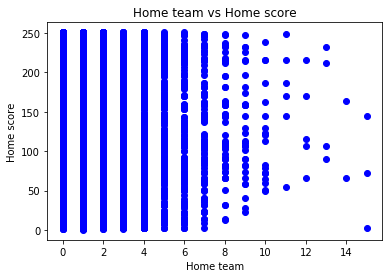

In [252]:
# making a scatter plot between home team and home scores
plt.scatter(x,y, color='blue')
plt.xlabel('Home team')
plt.ylabel('Home score')
plt.title('Home team vs Home score')
plt.show()

In [232]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

#train the Linear Regression
from sklearn.linear_model import LinearRegression
reg_line = LinearRegression()
reg_line.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

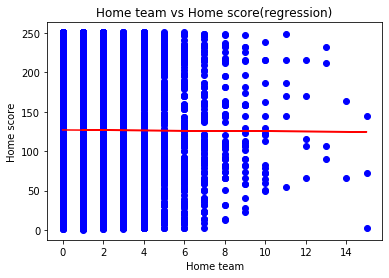

In [256]:
#visualise the linear regression
plt.scatter(x,y, color='blue')
plt.plot(x, reg_line.predict(x), color='red')
plt.xlabel('Home team')
plt.ylabel('Home score')
plt.title('Home team vs Home score(regression)')
plt.show()

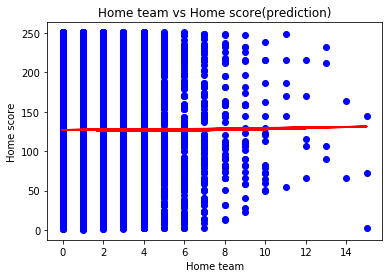

In [255]:
# fit polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)

pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

plt.scatter(x,y, color='blue')
plt.plot(x, pol_reg.predict(x_poly), color='red')
plt.xlabel('Home team')
plt.ylabel('Home score')
plt.title('Home team vs Home score(prediction)')
plt.show()

In [240]:
# making predictions
lin_pred = reg_line.predict([[3]])
print('Linear prediction: %d' %lin_pred)
poly_pred = pol_reg.predict(poly_reg.fit_transform([[3]]))
print('Polynomial prediction: %d' %poly_pred)


Linear prediction: 126
Polynomial prediction: 126


**Cross validation**

In [0]:
# we are just going to use just one independent variable
x = footie.home_score.values.reshape(-1,1)
y = footie.home_team

In [245]:
# applying folds
from sklearn.model_selection import KFold
from sklearn import metrics
folds = KFold(n_splits=5)
folds

KFold(n_splits=5, random_state=None, shuffle=False)

In [246]:
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(x):
  print('\nTraining model ' + str(count))

  # train the model

  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fit a model
  regressor = LinearRegression()  
  regressor.fit(x_train, y_train)

  # make a prediction
  y_pred = regressor.predict(x_test)

  # assessing the accuracy of the model
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))

  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1


Training model 1
Model 1 Root Mean Squared Error: 70.44319109914605

Training model 2
Model 2 Root Mean Squared Error: 68.47891489646871

Training model 3
Model 3 Root Mean Squared Error: 70.52692363046536

Training model 4
Model 4 Root Mean Squared Error: 70.41400936673925

Training model 5
Model 5 Root Mean Squared Error: 70.96338268119847


Model 5 had a larger RMSE compared to the rest.

In [247]:
# getting an analysis of the RMSE values othe five models
np.mean(RMSES)

70.16528433480357

*Residual plots*

In [261]:
# preparing data for crating residual plots

x = footie.home_score.values.reshape(-1,1)
y = footie.home_team

x_train, x_test, admit_train, admit_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(x_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

-1.5600824484826328

home team team scores at an average of -1.56

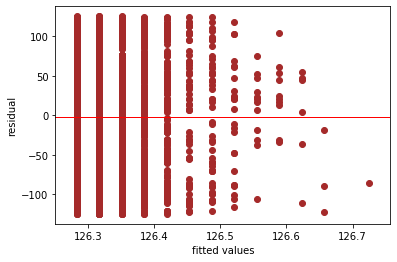

In [263]:
plt.scatter(admit_predict, residuals, color='brown')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

Our data is not badly off. The residuals are centred around the mean.

**Heteroskedasticity test**

In [266]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print('*'*50)

#we conduct a hypothesis
#null hypothesis: variance is homogeneous
#alternate hypothesis : variance is not homogeneous


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


inf
**************************************************
the variances are homogeneous!


**polynomial regression for away team**

In [0]:
# preparing the data
x = footie.away_score.values.reshape(-1,1)
y = footie.away_team

In [0]:
plt.scatter(x,y, color='blue')

# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

#train the Linear Regression
from sklearn.linear_model import LinearRegression
reg_line = LinearRegression()
reg_line.fit(x,y)

plt.scatter(x,y, color='blue')
plt.plot(x, reg_line.predict(x), color='red')
plt.show()

In [0]:
# fit polynomial regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)

pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

plt.scatter(x,y, color='blue')
plt.plot(x, pol_reg.predict(x_poly), color='red')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [0]:
# making predictions
lin_pred = reg_line.predict([[3]])
print('Linear prediction: %d' %lin_pred)
poly_pred = pol_reg.predict(poly_reg.fit_transform([[3]]))
print('Polynomial prediction: %d' %poly_pred)

**Cross validation**

In [0]:
# we are just going to use just one independent variable
x = footie.away_score.values.reshape(-1,1)
y = footie.away_team

In [0]:
# applying folds
from sklearn.model_selection import KFold
folds = KFold(n_splits=5)
folds

In [248]:
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(x):
  print('\nTraining model ' + str(count))

  # splitting the data
  x_train, x_test = x[train_index], x[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # training the model
  regressor = LinearRegression()  
  regressor.fit(x_train, y_train)

  # predictions
  y_pred = regressor.predict(x_test)

  # assessing the accuracy of the model
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1


Training model 1
Model 1 Root Mean Squared Error: 70.44319109914605

Training model 2
Model 2 Root Mean Squared Error: 68.47891489646871

Training model 3
Model 3 Root Mean Squared Error: 70.52692363046536

Training model 4
Model 4 Root Mean Squared Error: 70.41400936673925

Training model 5
Model 5 Root Mean Squared Error: 70.96338268119847


The fifth model is the highest.

In [249]:
# getting the average of the RMSE values
np.mean(RMSES)

70.16528433480357

**Residual Plot**

In [267]:
# preparing the data
x = footie.away_score.values.reshape(-1,1)
y = footie.away_team

x_train, x_test, admit_train, admit_test = train_test_split(x, y, test_size=0.2, random_state=0)


regressor = LinearRegression()
regressor.fit(x_train, admit_train)

# This is our prediction for admission based on our model
admit_predict = regressor.predict(x_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(admit_predict, admit_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

residuals.mean()

0.5813056230681558

we can say that the mean is fairly close to 0.

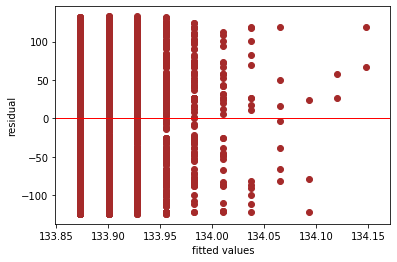

In [268]:
plt.scatter(admit_predict, residuals, color='brown')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

The residuals are centered around the mean. Its not that bad. A heteroskedasticity test will prove if we are on the right direction.

**Heteroskedasticity test**

In [269]:
import scipy as sp

test_result, p_value = sp.stats.bartlett(admit_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(admit_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
print('*'*50)

#we conduct a hypothesis
#null hypothesis: variance is homogeneous
#alternate hypothesis : variance is not homogeneous


if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
**************************************************
the variances are homogeneous!


#Logistic regression

In [108]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


Creating a column for status

In [0]:
results['goal_difference'] = results['home_score'] - results['away_score']

In [110]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [0]:
# conveting the data in goal differeance to either a win ,draw or a loss
results.loc[results.goal_difference > 0, 'status']= 'Win'
results.loc[results.goal_difference == 0, 'status']= 'Draw'
results.loc[results.goal_difference < 0, 'status']= 'Loss'

In [112]:
results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,goal_difference,status
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,Win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,4,Win
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,-2,Loss
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,-2,Loss
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,5,Win
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,9,Win


Implementation of status column was a success

In [0]:
results.dtypes

date               object
home_team          object
away_team          object
home_score          int64
away_score          int64
tournament         object
city               object
country            object
neutral              bool
goal_difference     int64
status             object
dtype: object

there are 7 categorical data that needs to be converted to numerical data.
*******
also goal_difference column needs to be dropped since it will not be relevant anymore

In [0]:
results.date = le.fit_transform(results.date)
results.home_team = le.fit_transform(results.home_team)         
results.away_team = le.fit_transform(results.away_team)
results.tournament = le.fit_transform(results.tournament)        
results.city  = le.fit_transform(results.city)             
results.country = le.fit_transform(results.country)
results.status = le.fit_transform(results.status)

conversion of the categorical data was a success

In [0]:
# dropping of the goal_difference column
results.drop(columns=['goal_difference'], inplace=True)

In [116]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'status'],
      dtype='object')

In [0]:
# preparing data
X = results.iloc[:,:8].values
y = results.iloc[:,-1].values


In [0]:
# spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [123]:
# training the dataset
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# making predictions
y_pred = LogReg.predict(X_test)

In [125]:
# evaluating the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[   0,   20, 1864],
       [   0,   52, 2291],
       [   0,   49, 3892]])

0, 52, 3892 are the correct number of predictions, whereas the rest are false number of predictions

## 8. Challenging the solution

A better data cleaning must be done so as to get the best prediction.